In [168]:
import numpy as np 
import statistics
import pandas as pd 
import random 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt 

In [151]:
from sklearn.datasets import load_iris, fetch_california_housing

In [53]:
load_data = load_iris()

In [54]:
df = pd.DataFrame(load_data.data , columns=load_data.feature_names)

# A) RANDOM SAMPLING

In [63]:
df_population = df["sepal length (cm)"]

### 1. sampling with numpy random choice

In [106]:
np.random.choice(df_population,size=10)

array([6.4, 4.4, 5.7, 5.6, 4.6, 5.7, 5.4, 7.7, 6.8, 5.4])

### 2. sampling with statistics module

In [107]:
statistics.random.choices(population=df_population,k=10)

[5.9, 6.3, 5.8, 5.6, 5.1, 5.6, 6.6, 6.1, 4.4, 5.2]

### 3. sampling with random module

In [109]:
random.sample(population=df_population.to_list(),k=10)

[6.7, 5.5, 6.4, 5.2, 5.6, 5.0, 5.0, 4.8, 7.2, 6.1]

### 4. stratified sampling with sklearn module

In [110]:
train_test_split(df_population,train_size=10)[0]

110    6.5
83     6.0
120    6.9
4      5.0
34     4.9
94     5.6
145    6.7
122    7.7
149    5.9
80     5.5
Name: sepal length (cm), dtype: float64

## EXPERIMENTING AND COMPARING SPEEDS W/ TIMEIT 
-r : 7

-n : 100

sample size = 100000 for each

In [68]:
synth_data = np.random.randint(low=1,high=100000000,size= 1000000)

In [116]:
numpy = %timeit -r 7 -n 100 -o np.random.choice(synth_data,size=100000)

997 µs ± 92.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [117]:
numpy = numpy.average*1000

In [101]:
stats = %timeit -r 7 -n 100 -o statistics.random.choices(population=synth_data,k=100000)

24 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [119]:
stats= stats.average*1000

In [120]:
rand = %timeit -r 7 -n 100 -o random.sample(population=synth_data.tolist(),k=100000)

103 ms ± 8.23 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [121]:
rand = rand.average*1000

In [122]:
sklearn = %timeit -r 7 -n 100 -o train_test_split(synth_data,train_size=100000)[0]

28.8 ms ± 587 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [123]:
sklearn = sklearn.average*1000

## PLOT THE RESULTING TIMINGS

In [132]:
import seaborn as sns 

<Axes: >

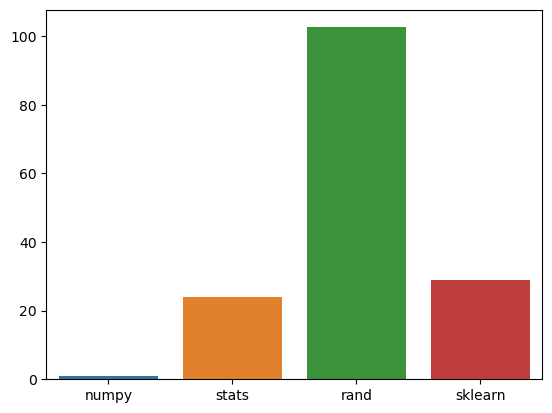

In [147]:
;
label=["numpy","stats","rand","sklearn"]
data= [numpy,stats,rand,sklearn]
sns.barplot(x=label,y=data)

***

# B) STRATIFIED SAMPLING

population is divided into non-overlapping subgroups or strata based on certain characteristics. Samples are then randomly selected from each stratum to ensure proportional representation.
- Identify the characteristic (stratification variable) that defines the subgroups.
- Divide the population into mutually exclusive strata based on this characteristic.
- Randomly sample from each stratum independently to create the final sample

for example: Suppose you're conducting a survey on a university campus with students from different majors. Stratified sampling involves creating strata based on majors (e.g., engineering, arts, sciences), and then randomly selecting students from each stratum.

In [152]:
df2= pd.DataFrame(data=fetch_california_housing().data,columns=fetch_california_housing().feature_names)

In [157]:
df2["HouseAge"]= pd.qcut(df2["HouseAge"],q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

### 1. pandas groupby then sample randomly

In [166]:
def random_sample(group):
    return group.sample(n=100)
    
# return 100 random samples for each group

In [174]:
%%timeit
df2.groupby("HouseAge").apply(random_sample) # total sample size = 100 *5 = 500

5.31 ms ± 537 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 2. sklearn StratifiedShuffleSplit

In [193]:
%%timeit 
sss= StratifiedShuffleSplit(n_splits=1, train_size=500)
data_indices = next(sss.split(df2,df2["HouseAge"]))
df2.iloc[data_indices[0]]

17.5 ms ± 3.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# C) SYSTEMATIC SAMPLING

It involves dividing the population size by the sample size to determine the "sampling interval," and then selecting every nth item from the population.

- Determine the total population size (N) and the desired sample size (n).
- Calculate the sampling interval (k) as N/n.
- Randomly select a starting point (a number between 1 and k).
- Select every kth element from the population as the sample.

Disadvantages:

- Bias potential: If there is a hidden pattern or periodicity in the population, it may lead to bias in the sample.
- Limited randomization: The randomness comes from the initial starting point, so if the starting point isn't truly random, it can introduce bias.

In [206]:
sample_size= 10 
interval = int(df_population.size/10)
df_population[random.randint(0,interval)::interval]


6      4.6
21     5.1
36     5.5
51     6.4
66     5.6
81     5.5
96     5.7
111    6.4
126    6.2
141    6.9
Name: sepal length (cm), dtype: float64

# D) CLUSTER SAMPLING
Cluster sampling is a probability sampling method where the population is divided into groups or clusters, and a random sample of clusters is selected. Then, all individuals within the selected clusters are included in the sample.

- Divide the population into non-overlapping clusters. Each cluster should ideally be a mini-representation of the population.
- Randomly select a certain number of clusters from the population.
- Include all individuals within the selected clusters in the sample

- Suitable for large and geographically dispersed populations.
- Reduces logistical challenges by sampling entire clusters rather than individuals.
- Cost-effective and time-efficient, especially for geographically spread populations.

In [212]:

# Create clusters (e.g., groups of 10 individuals)
clusters = [df_population[i:i+10] for i in range(0, len(df_population), 10)]

# Select random clusters
sample_size = 3
selected_clusters = random.sample(clusters, sample_size)

# Flatten selected clusters to get the sample
cluster_sample = [individual for cluster in selected_clusters for individual in cluster] # >>> 3*10 = 30
# for individual element in a cluster that is selected randomly from clusters

In [213]:
cluster_sample

[7.0,
 6.4,
 6.9,
 5.5,
 6.5,
 5.7,
 6.3,
 4.9,
 6.6,
 5.2,
 6.3,
 5.8,
 7.1,
 6.3,
 6.5,
 7.6,
 4.9,
 7.3,
 6.7,
 7.2,
 5.4,
 5.1,
 4.6,
 5.1,
 4.8,
 5.0,
 5.0,
 5.2,
 5.2,
 4.7]